## Sistemi di equazioni (in generale, non lineari)

La funzione *fsolve* di *scipy.optimize* è qui usata per risolvere un sistema di equazioni non lineari.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Come esempio scegliamo il sistema di equazioni

$$y-(x-1)e^{x/2}=-5\\
y-x\log(x+2)+4x=1$$

Risolviamo le due equazioni in funzione di *y* e costruiamo due funzioni Python che calcolino le due funzioni *y(x)* così definite: *fun_1* per la prima funzione, e *fun_2* per la seconda. 

In [2]:
def fun_1(x):
    return (x-1.)*np.exp(0.5*x)-5.

def fun_2(x):
    return x*np.log(x+2.)-4.*x+1.

Calcoliamo le due funzioni in un range appropriato e facciamone il plot allo scopo di individuare una zona dove queste si intersecano:

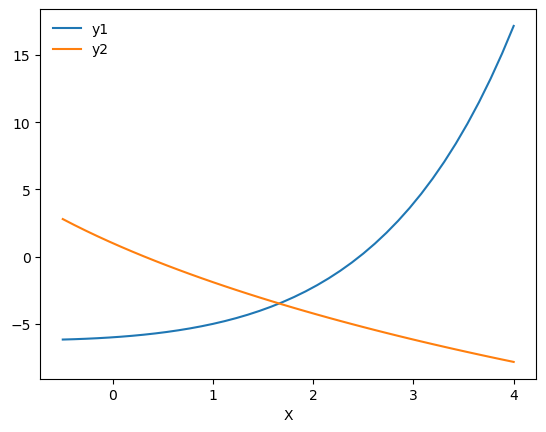

In [3]:
x_list=np.linspace(-0.5, 4, 40)
y1=fun_1(x_list)
y2=fun_2(x_list)

plt.figure()
plt.plot(x_list, y1, label="y1")
plt.plot(x_list, y2, label="y2")
plt.legend(frameon=False)
plt.xlabel("X")
plt.show()

Il punto di intersezione rappresenta la soluzione del sistema.

Riscriviamo adesso le due equazioni nella forma $f(x,y)=0$ per la prima, e $g(x,y)=0$  per la seconda:

$$y-(x-1)e^{x/2}+5=0 \ \longrightarrow \ f(x,y)=y-(x-1)e^{x/2}+5\\
y-x\log(x+2)+4x-1=0 \ \longrightarrow \ g(x,y)=y-x\log(x+2)+4x-1$$

e costruiamo una funzione Python che le raggruppi e le restituisca sotto forma di un array:

In [4]:
def f12(xy):
    eq1=xy[1]-fun_1(xy[0])
    eq2=xy[1]-fun_2(xy[0])
    return [eq1, eq2]

La funzione *f12* accetta come argomento (*xy*) una lista di due variabili che corrispondono a coppie di valori di $x$ e di $y$: *xy*\[0\]=*x*;  *xy*\[1\]=*y*

Proviamo la funzione *f12*: 

In [5]:
f12([3,5])

[1.036621859323871, 11.1716862626977]

I due valori ottenuti corrispondono alle due funzioni $f(x,y)$ e $g(x,y)$ nel caso in cui $x=3$ e $y=5$

Usiamo adesso *fsolve* passando come argomenti la funzione *f12*, un guess iniziale per *x* e *y* che approssima il punto di intersezione (lo possiamo desumere dal plot fatto sopra) e un parametro che controlla l'accuratezza voluta del risultato (*xtol*). Il risultato viene salvato nella variabile *result* che contiene i valori di $x$ e $y$ al punto di intersezione (soluzione del sistema di equazioni): 

In [6]:
guess=[1.8, -4]
result=fsolve(f12, guess, xtol=1e-12)

xsol=result[0]
ysol=result[1]

print("La soluzione è: x=%5.2f, y=%5.2f" % (xsol, ysol))

La soluzione è: x= 1.66, y=-3.49


I due valori per $x$ e $y$ soddisfano le due equazioni $f(x,y)=0$ e $g(x,y)=0$, entro la precisione voluta, infatti:

In [7]:
f12(result)

[4.440892098500626e-16, 4.440892098500626e-16]

Riportiamo la soluzione nel grafico:

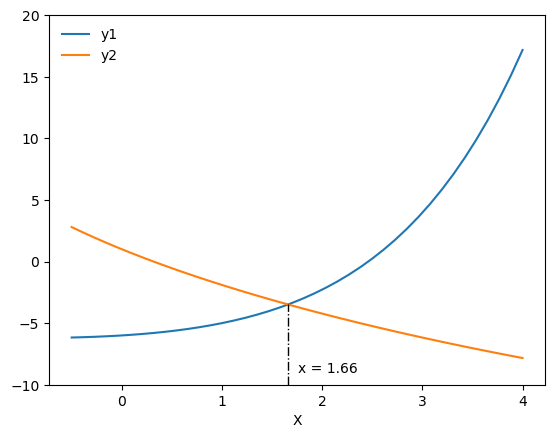

In [8]:
ymin=-10
txt="x = "+str(np.round(xsol, 2))
px=(xsol, xsol)
py=(ymin, ysol)
plt.figure()
plt.plot(x_list, y1, label="y1")
plt.plot(x_list, y2, label="y2")
plt.plot(px, py, "k-.", linewidth=1)
plt.legend(frameon=False)
plt.ylim(ymin,20)
plt.xlabel("X")
plt.text(xsol+0.1, ymin+1, txt)
plt.show()

# Soluzioni solide non ideali

Ricerca delle composizioni delle due fasi $\alpha$ e $\beta$ all'equilibrio, in funzione della temperatura

#### Parametri iniziali di entalpia e entropia delle fasi pure

Si suppone che questi parametri siano indipendenti dalla temperatura. Si definisce qui anche il parametro di Margules (**W**) che controlla l'entalpia di mescolamento (modello *regolare simmetrico*) e si assegna un valore alla temperatura.

In [9]:
# Costante dei gas
R=8.31

h0a=-22000
h0b=-18000
s0a=15.
s0b=22.

# Parametro di Margules
w=15000.

# Temperatura
temp=700.

# energie libere delle fasi costituite dai componenti puri
mu0a=h0a-temp*s0a
mu0b=h0b-temp*s0b

# Variabili utili per il plot
xm1=0.00001
xm2=1-xm1
nx=120

xa=np.linspace(xm1, xm2, nx)
xb=1.-xa

#### Definizioni delle funzioni principali per il calcolo delle diverse componenti all'energia libera, e per il plot

In [10]:
def mu0_x(x):
    return mu0a*x+mu0b*(1.-x)

def mix_ideal_x(x):
    return R*temp*(x*np.log(x) + (1.-x)*np.log(1.-x))

def mix_non_ideal_x(x):
    return w*x*(1.-x)

def mu_x(x):
    return mu0_x(x)+mix_ideal_x(x)+mix_non_ideal_x(x)

def mu_der_x(x):
    return mu0a-mu0b+R*temp*(np.log(x) - np.log(1.-x)) + w*(1.-2*x)

def plot_mu(final=False):   
    mu_plot=[mu_x(ix) for ix in xa]
    title="Energia libera per T = "+str(temp)+" K"
    plt.figure()
    plt.plot(xa, mu_plot, "b-")
    if final:
       plt.plot(xa, line, "k--")
       plt.plot(xp1, yp1, "k-.", linewidth=1.)
       plt.plot(xp2, yp2, "k-.", linewidth=1.)
    plt.xlim(0, 1)
    if final:
       plt.ylim(y_min_plot, y_max_plot)
    plt.xlabel("$X_a$")
    plt.title(title)
    if final:
       tx1=np.round(xp1[0], 3)
       tx2=np.round(xp2[0], 3)
       tx1=str(tx1)
       tx2=str(tx2)
       plt.text(0.02, y_max-delta_y*0.05, "$x_1$: "+tx1)
       plt.text(0.02, y_max-delta_y*0.13, "$x_2$: "+tx2)
    plt.show()

Visualizziamo la curva $\mu(x)$:

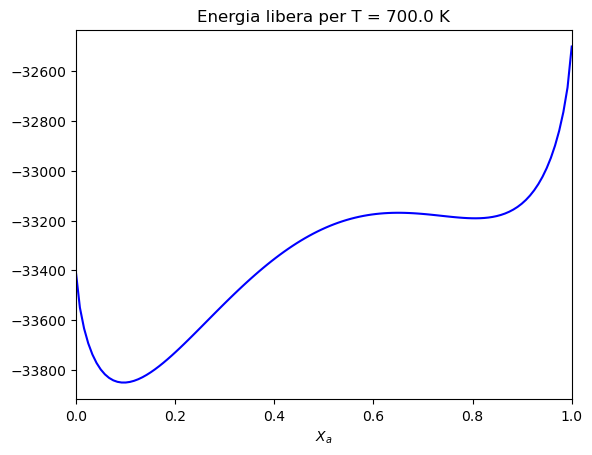

In [11]:
plot_mu()

Il calcolo viene effettuato cercando la tangente comune a due punti della curva dell'energia libera della soluzione non ideale. I due punti definiscono l'intervallo di composizioni entro il quale il sistema *smescola* nelle due diverse fasi $\alpha$ e $\beta$: $x^{\alpha}$ e $x^{\beta}$, rispettivamente.

Posto $x_1 = x^{\alpha}, x_2 =x^{\beta}, y_1=\mu(x_1), y_2=\mu(x_2)$  

(quattro incognite), le quattro equazioni necessarie per risolvere il problema sono:

$$y_1 = \mu(x_1)\\
y_2 =\mu(x_2)\\
\mu^\prime(x_1)=\mu^\prime(x_2)\\
\frac{y_2-y_1}{x_2-x_1}=\mu^\prime(x_1)$$

Si noti che la funzione $\mu^\prime$ indica la derivata prima di $\mu$ rispetto a $x$.

La funzione della libreria *scipy* che verrà utilizzata per risolvere il sistema di equazioni è *fsolve*. Per utilizzarla, occorre definire tutte le equazioni del tipo $f(x)=g(x)$ come $f(x)-g(x)=0$ e passarle poi a *fsolve* nella forma $f(x)-g(x)$.

Le diverse equazioni devono essere organizzate in forma di *lista*. A tal scopo si definisce di seguito una funzione (*func*) che accetta come input una lista corrispondente ai valori delle quattro incognite (inizialmente approssimati): nel nostro caso, la lista *unk*=\[x1, x2, y1, y2\]. La funzione *func* restituisce una lista delle quattro equazioni:

In [12]:
def func(unk):
    x1=unk[0]
    x2=unk[1]
    y1=unk[2]
    y2=unk[3]    
    yc1=mu_x(x1)
    yc2=mu_x(x2)
    
    d1=mu_der_x(x1)
    d2=mu_der_x(x2)
    
    eq1=y1-yc1
    eq2=y2-yc2
    eq3=d1-d2
    eq4=(y1-y2)/(x1-x2)-d1
    
    return [eq1, eq2, eq3, eq4]

La funzione *start* esegue effettivamente il calcolo, chiamando la funzione *fsolve* a cui passa come argomenti la funzione *func* e un *guess iniziale* appropriato da cui far partire la ricerca (il guess iniziale è determinato dai valori delle due variabili *gx1* e *gx2*)

In [13]:
def start():
    gx1=0.01
    gx2=0.99
    gy1=mu_x(gx1)
    gy2=mu_x(gx2)
    guess=[gx1, gx2, gy1, gy2]
    result=fsolve(func, guess, xtol=1e-12)
    x1=result[0]
    x2=result[1]
    y1=result[2]
    y2=result[3]
    print("Solvus trovato da x1=%4.3f a x2=%4.3f" % (x1, x2))
    return x1, x2, y1, y2

Definita la funzione, questa viene lanciata salvando i risultati nelle variabili *x1, x2, y1, y2*:

In [14]:
x1, x2, y1, y2=start()

Solvus trovato da x1=0.128 a x2=0.872


#### Calcolo dei parametri necessari alla funzione *plot_mu*

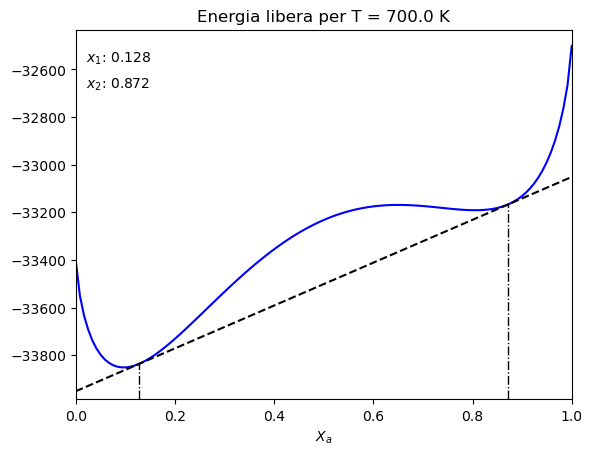

In [15]:
slope=(y1-y2)/(x1-x2)
q=y1-slope*x1

line=slope*xa+q

ya=mu_x(xa)
y_min=np.min(ya)
y_max=np.max(ya)
delta_y=y_max-y_min

y_min_plot=int(y_min-delta_y*0.1)
y_max_plot=int(y_max+delta_y*0.05)

xp1=(x1, x1)
yp1=(y_min_plot, y1)

xp2=(x2, x2)
yp2=(y_min_plot, y2)

plot_mu(final=True)